#Marketplace Data Provider Template Example Starter Notebok
The goal of this notebook is to provide an outline for a common workflow customers use to examine new data shared with them. This is not an exhaustive data exploration presentation and you are encouraged to highlight interesting examples to demonstrate the value of the data. 

When builing out your notebooks, its ofter good to show:
- Schema Diagram
- Dataset overview/description (a few paragraphs)
- Minimum of 6-10 queries, prefereably:
  - 2 to 4 of coverage/exploration of the data
  - 2 to 6 sample queries showing how to drive insights from the data

## Notebooks Basics & Goals

Notebooks provide cell-by-cell execution of code. <b>Multiple languages can be mixed in a notebook</b>. Users can add plots, images, and markdown text to enhance their code.Notebooks can be easily deployed as production code with Databricks, as well as providing a robust toolset for data exploration, reporting, and dashboarding.

<b>Running a Cell</b>
* Run the cell below using one of the following options:
  * **CTRL+ENTER** or **CTRL+RETURN**
  * **SHIFT+ENTER** or **SHIFT+RETURN** to run the cell and move to the next one
  * Using **Run Cell**, **Run All Above** or **Run All Below** as seen here<br/><img style="box-shadow: 5px 5px 5px 0px rgba(0,0,0,0.25); border: 1px solid rgba(0,0,0,0.25);" src="https://files.training.databricks.com/images/notebook-cell-run-cmd.png"/>


<b>Databricks visualizations</b>

When using the [Databricks built in visualizations](https://docs.databricks.com/notebooks/visualizations/index.html), you will see tabs above the output, to the right of the data table. You can create multiple visualizations for the returned data.

<img style="box-shadow: 5px 5px 5px 0px rgba(0,0,0,0.25); border: 1px solid rgba(0,0,0,0.25);" src="https://docs.databricks.com/_images/camera-in-nb-cell.png" width="800" height="900" />



## Notebook Goals
<b>Teach</b> 
- The content within that dataset
- Differentiate the dataset and its significance
- Convey history and coverage
- Demonstrate key concepts for each dataset
- Use ample [markdown](https://www.markdownguide.org/cheat-sheet/#basic-syntax)

<b>Thought</b> 
- Ability to generate thought and engage with customers in unique ways.

<b>Insightful</b>
- Provides information that customers ask and need when trialing.

##Design Principles

<b>Simplicity</b>
- Make sure the notebooks highlight the content and try to prevent clients from getting lost in 'tech'

<b>Consistency</b>
- Use consistent linking, naming, and packaging with the (new) Support Center and Marketplace

<b>Visual </b>
- Use visuals when possible to make the data less boring and enrich the story

#General Structure of Notebooks
Each of the notebooks should have the following components
1. Title 
1. Section 1 - Introduction
1. Section 2 - Exploring the Data
1. Section 3 - Sample Queries
1. Section 4 - Insights

### Section 1 - Understanding the Dataset

####References

You can provide links to:
- Data Marketing pages
- Support Resources
- Data Dictionary (if one exists)

#### Dataset Overview

It is also appropriate to include a dataset overview for the section.  This section should display minimal content about the dataset.  Try to keep this area to just a few (2-3) paragraphs at most.  The user should be provided with context about what they are reviewing but without repeating too much content from Marketplace or Support resources.

####Schema (optional but useful)

Post an image to the schema(s) from the User Guide.  Images need to be uploaded to online storage so they can used in an img html tag

### Section 2 - Exploring the Data

#### Data and Key Data Elements

This area is reserved for helping customers understand the data and key learning points in critical tables.  Using minimal text, and even images, in this section is fine.  But, try to make the content interactive using example queries when possible.

####Coverage and Summary Statistics

Use this space to write some (basic) coverage related queries.  Use visualizations to enhance the story.  Feel free to ad-hoc and do some queries that include things like sector coverage, country coverage, or coverage over time.

### Section 3 - Sample Queries
Use this section to include some sample queries that show using the data .  Start with basic examples and then increase complexity. Three to five sample queries is a good number to shoot for.

### Section 4 - Insights
This section should be for your creativity.  The goal here is to go beyond any user guides/marketing information and show the customer deeper insights.  Some ideas of things to highlight here would be
- Advanced queries
- Trend analysis in data
- Pyton and other advanced tools
- Data science analysis like correlations
- Integrating with other data (e.g. the customers own data)
- It may be appropriate to make "Insights" its own notebooks as well

##Additional Considerations for Consistency

Consider the other following good practices when writing these notebooks:
- Please be conscious of the data you are using. Don't join data the customer doesn't have access to for examples.
- When done writing SQL, use the "Format SQL" option in the editor so that all SQL has a similar look and feel (though it will make it verbose)
- Always point to your support site for links that help the customer make sense of any complexities.
- Try to eliminate unnecessary columns from output.
- Always use an alias for a transformed, aggregated, or cast column for consistency in table output
- Do not use special characters (*, &, $, %) in notebook or folder names

# NFL Data - Marketplace Notebook Example

## Data ingestion and prep for the Marketplace data example
<b>The next three commands are not steps you will need in your notebooks.</b> This is being done to ingest & load a common data set for us to work from. In this example, we will load sample data from a public API into your Lakehouse to allow you to walk through the full process and execute the statements to see how they work. <b>When using Databricks Marketplace, you will be utilizing Delta Sharing to share the data with customers.</b> At the end of the notebook, there will be a command to delete all of the data used. The data will load into the <b>marketplace_data_example</b> catalog in the <b>nfldata</b> schema. In this schema, we will load the following tables:
- <b>players</b> - Provides descriptive data for all players (player ID, position, height, weight, college, etc.)
- <b>annual_data</b> - Provides annual performance information (Passing Yards, Rushing Yards, etc.)
- <b>weekly_data</b> - Provides weekly performance information (Passing Yards, Rushing Yards, etc.) for 2022
- <b>game_results</b> - Provides the results of specific games
- <b>injury_data</b> - Provides 5 years of player injury data
- <b>team_data</b> - Provides team level informaion (logo url, location, stadium, etc.)

##### Add the necessary library to extract our sample data via API.

In [0]:
%pip install nfl_data_py

Python interpreter will be restarted.
Python interpreter will be restarted.


##### Create a catalog and schema to load the example data

In [0]:
sqlContext.sql(f"CREATE CATALOG IF NOT EXISTS marketplace_data_example COMMENT 'Marketplace Data Sample'");
sqlContext.sql(f"CREATE SCHEMA IF NOT EXISTS marketplace_data_example.nfldata");
#set the namespace to the nfldata schema for ease in queries.
sqlContext.sql(f"use marketplace_data_example.nfldata");


##### Extract and Load data

In [0]:
import nfl_data_py as nfl
#Create list of years to load data
YEARS = [2022 - i for i in range(20)]
FIVE_YEARS_HISTORY = [2022 - i for i in range(5)]

#Query and load data. 

#Annual Player Data:
nfl_annual_data = spark.createDataFrame(nfl.import_seasonal_data(YEARS))
nfl_annual_data.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.annual_data')

#Player Mapping:
nfl_player_data = spark.createDataFrame(nfl.import_players())
nfl_player_data.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.players')

#2022 Weekly Data:
weekly_player = spark.createDataFrame(nfl.import_weekly_data([2022]))
weekly_player.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.weekly_data')

#Schedule Data
schedules = spark.createDataFrame(nfl.import_schedules(YEARS).drop(columns=['surface','referee','nfl_detail_id']))
schedules.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.game_results')

#Injury Data
injury_data = spark.createDataFrame(nfl.import_injuries(FIVE_YEARS_HISTORY))
injury_data.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.injury_data')

#Team Data 
nfl_team_data = spark.createDataFrame(nfl.import_team_desc().drop(columns=['team_color3','team_color4']))
nfl_team_data.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable('marketplace_data_example.nfldata.team_data')



/local_disk0/.ephemeral_nfs/envs/pythonEnv-15d7dbed-c4d0-4a91-a60f-5320d5bad4ff/lib/python3.9/site-packages/nfl_data_py/__init__.py:290: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_stats = all_stats.drop(['recent_team', 'week'], axis=1).groupby(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-15d7dbed-c4d0-4a91-a60f-5320d5bad4ff/lib/python3.9/site-packages/nfl_data_py/__init__.py:309: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  szn = data.groupby(['player_id', 'season', 'season_type']).sum().reset_index().merge(
/databricks/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is d

## NFL Player Data

###Introduction
In this notebook, we will provide an understanding of the NFL dataset and example queries to help you quickly understand the data and best practices. Additioanlly, this notebook seeks to demonstrate the full range of capabilities within Databricks. We will be using mostly SQL and Python in this notebook to demonstrate the multilanguage capabilities. <hr>The NFL Player Dataset provides you with the most recent year (2022) of weekly player stats and 20 years of annual and reference data. This data allows for in-depth analysis of NFL players and to build models around past performances an general player trends.

- [Example Data Dictionary Link](https://github.com/nflverse/nfldata/blob/master/DATASETS.md#rosters)

### Data Exploration

In [0]:
%sql
select
  count(*) as playerCount
from
  players

playerCount
19272


In [0]:
%sql
DESCRIBE players 

col_name,data_type,comment
status,string,null
display_name,string,null
first_name,string,null
last_name,string,null
esb_id,string,null
gsis_id,string,null
suffix,string,null
birth_date,string,null
college_name,string,null
position_group,string,null


In [0]:
# Get data into a dataframe using Spark
df = sqlContext.sql("select * from annual_data")
# Convert to a Pandas dataframe and describe the data
df.describe().toPandas()

,summary,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,...,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,count,11765,11765,11765,11765,11765,11765,11765,11765,11765,...,11765,11765,11765,11765,11765,11765,11765,11765,11765,11765
1,mean,None,2012.726561835954,None,18.37849553761156,29.682022949426266,209.55146621334467,1.2840628984275393,0.8004249893752656,2.004674883127922,...,NaN,NaN,0.07549904721790082,NaN,0.07603560675676757,0.07619735867756924,NaN,NaN,0.5299768051537078,0.0785460965138338
2,stddev,None,5.795736375546462,None,68.56475727444052,108.85640879678031,787.0567404299208,5.1675156937884985,2.9384684608130867,7.35181583669553,...,NaN,NaN,0.0833917772965026,NaN,0.08550669566479513,0.08619170558347385,NaN,NaN,0.5949894851719723,0.06190820337551422
3,min,00-0000007,2003,REG,0,0,-6.0,0,0.0,0.0,...,-Infinity,-0.0026315789473684223,-0.0582010582010582,0.0,0.0,0.0,-0.0291005291005291,-0.04656084656084656,-0.34615384615384615,-0.3151927437641723
4,max,00-0038149,2022,REG,490,733,5477.0,55,30.0,68.0,...,NaN,NaN,0.48710897215537985,NaN,1.0,1.0,NaN,NaN,4.025568181818182,0.3646281752160626


In [0]:
%sql
select
  position_group,
  position,
  count(*) as player_count_by_position
from
  players
where
  position_group is not null
group by
  position_group,
  position
order by
  position_group

position_group,position,player_count_by_position
DB,SS,302
DB,SAF,63
DB,FS,300
DB,DB,1837
DB,WR,1
DB,LB,2
DB,CB,962
DB,S,7
DL,DT,1197
DL,DE,1344


Output can only be rendered in Databricks

### Sample Queries

In [0]:
%sql
select
  *
from
  players
where
  college_name = 'Georgia'
  and position = 'RB'
limit
  10

status,display_name,first_name,last_name,esb_id,gsis_id,suffix,birth_date,college_name,position_group,position,jersey_number,height,weight,team_abbr,team_seq,current_team_id,football_name,entry_year,rookie_year,draft_club,college_conference,status_description_abbr,status_short_description,gsis_it_id,short_name,smart_id,headshot,draft_number,uniform_number,draft_round,season
ACT,Nick Chubb,Nicholas,Chubb,CHU033942,00-0034791,null,1995-12-27,Georgia,RB,RB,24.0,5-11,225,CLE,1.0,1050,Nick,2018.0,2018.0,CLE,Southeastern Conference,A01,Active,46104.0,N.Chubb,32004348-5503-3942-d8b2-181bd658412e,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/a8ib0haur75wrhqrbtyo",35.0,24,null,NaN
ACT,D'Andre Swift,D'Andre,Swift,SWI228476,00-0036275,null,1999-01-14,Georgia,RB,RB,32.0,5-10,211,DET,NaN,1540,D'Andre,2020.0,2020.0,DET,Southeastern Conference,A01,Active,52443.0,D.Swift,32005357-4922-8476-53db-e64aaf6e01f5,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/dtyenl0mb55yvh90ttoz",35.0,32,null,2020.0
RES,Elijah Holyfield,Elijah,Holyfield,HOL799542,00-0035442,null,1997-11-30,Georgia,RB,RB,36.0,5-10,215,CIN,1.0,0920,Elijah,2019.0,2019.0,null,Southeastern Conference,R01,R/Injured,48586.0,E.Holyfield,3200484f-4c79-9542-5012-235f6662a469,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/gkxpxqxocxeutf0c5ae5",NaN,36,null,NaN
ACT,Sony Michel,Sony,Michel,MIC517884,00-0034845,null,1995-02-17,Georgia,RB,RB,20.0,5-11,215,LAC,1.0,4400,Sony,2018.0,2018.0,NE,Southeastern Conference,A01,Active,46100.0,S.Michel,32004d49-4351-7884-c6be-b720a5a54649,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/eydtwcqcaegkuwivq0ln",31.0,20,null,NaN
UFA,Todd Gurley,Todd Gurley II,Gurley,GUR000000,00-0032241,II,1994-08-03,Georgia,RB,RB,21.0,6-1,224,ATL,1.0,0200,Todd,2015.0,2015.0,STL,Southeastern Conference,A01,Active,42353.0,T.Gurley,32004755-5200-0000-f496-e727c8f2225d,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/ym7oprwel3dxbab0k7x9",10.0,21,null,NaN
ACT,Keith Marshall,Keith,Marshall,MAR429932,00-0032806,null,02/16/1994,Georgia,RB,RB,39.0,5-11,222,WAS,1.0,5110,Keith,2016.0,2016.0,WAS,Southeastern Conference,A01,Active,43531.0,null,32004d41-5242-9932-6591-d4257e052794,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/cbkduvk2jwseoflueo6r",242.0,null,null,NaN
CUT,Quayvon Hicks,Quayvon,Hicks,HIC623470,00-0033197,null,07/17/1994,Georgia,RB,RB,36.0,6-2,351,TB,1.0,4900,Quayvon,2017.0,2017.0,null,Southeastern Conference,A01,Active,44377.0,null,32004849-4362-3470-1263-032cbcbd13f1,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/wnhs8v69zmpmh6qx8vrv",NaN,null,null,NaN


In [0]:
%sql
select
  pd.display_name,
  ann.*
from
  (
    select
      player_id,
      season,
      completions,
      attempts,
      passing_yards,
      passing_tds,
      interceptions,
      sacks,
      sack_yards,
      passing_air_yards,
      passing_yards_after_catch,
      passing_first_downs,
      games
    from
      marketplace_data_example.nfldata.annual_data
  ) ann
  left join (
    Select
      distinct gsis_id,
      display_name,
      position
    from
      marketplace_data_example.nfldata.players
  ) pd on ann.player_id = pd.gsis_id
where
  pd.gsis_id in('00-0019596', '00-0022924', '00-0023459')
order by
  season

display_name,player_id,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,passing_air_yards,passing_yards_after_catch,passing_first_downs,games
Tom Brady,00-0019596,2003,317,527,3620.0,23,12.0,32.0,219.0,0.0,0.0,175.0,16
Ben Roethlisberger,00-0022924,2004,196,295,2621.0,17,11.0,30.0,213.0,0.0,0.0,130.0,14
Tom Brady,00-0019596,2004,288,474,3692.0,28,14.0,26.0,162.0,0.0,0.0,188.0,16
Tom Brady,00-0019596,2005,334,530,4110.0,26,14.0,26.0,188.0,0.0,0.0,193.0,16
Ben Roethlisberger,00-0022924,2005,168,268,2385.0,17,9.0,23.0,129.0,0.0,0.0,111.0,12
Aaron Rodgers,00-0023459,2005,9,16,65.0,0,1.0,3.0,28.0,0.0,0.0,3.0,3
Aaron Rodgers,00-0023459,2006,6,15,46.0,0,0.0,3.0,18.0,151.0,22.0,2.0,2
Ben Roethlisberger,00-0022924,2006,281,470,3528.0,18,23.0,46.0,280.0,4344.0,1503.0,179.0,15
Tom Brady,00-0019596,2006,320,517,3533.0,24,12.0,26.0,175.0,4170.0,1673.0,176.0,16
Ben Roethlisberger,00-0022924,2007,265,405,3158.0,32,11.0,47.0,347.0,3910.0,1081.0,168.0,15


Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
%sql
select
  distinct season,
  gsis_id
from
  injury_data
where
  report_status = 'Out'
  and report_primary_injury = 'Concussion'
order by
  season

season,gsis_id
2018.0,00-0033393
2018.0,00-0032120
2018.0,00-0032353
2018.0,00-0030160
2018.0,00-0031936
2018.0,00-0032749
2018.0,00-0031362
2018.0,00-0031394
2018.0,00-0023645
2018.0,00-0032203


Output can only be rendered in Databricks

In [0]:
%sql
select
  position,
  week,
  fantasy_points
from
  weekly_data

position,week,fantasy_points
RB,18,6.099999904632568
TE,1,0.0
TE,5,0.0
TE,6,1.600000023841858
TE,7,2.0999999046325684
TE,10,0.0
TE,14,1.100000023841858
TE,15,8.800000190734863
TE,18,6.300000190734863
WR,1,12.399999618530273


Output can only be rendered in Databricks

### Insights

In [0]:
%sql
select
  team,
  sum(score) as totalPoints
from(
    select
      *
    from
      (
        select
          season,
          week,
          away_team as team,
          away_score as score
        from
          game_results
        union all
        select
          season,
          week,
          home_team as team,
          home_score as score
        from
          game_results
      ) pts
    where
      season = 2022
      and week <= 18
  )
group by
  team
order by
  totalpoints desc
limit
  10

team,totalPoints
KC,496.0
PHI,477.0
DAL,467.0
BUF,455.0
DET,453.0
SF,450.0
MIN,424.0
CIN,418.0
SEA,407.0
JAX,404.0


In [0]:
%sql
select
  season,
  recent_team,
  display_name,
  position,
  sum(totalPoints) as totalPoints
from(
    select
      player_id,
      ad.season,
      recent_team,
      display_name,
      ad.position,(passing_tds * 6) + (passing_2pt_conversions * 2) as passingPoints,(rushing_tds * 6) + (rushing_2pt_conversions * 2) as rushingPoints,(receiving_tds * 6) + (receiving_2pt_conversions * 2) as receivingPoints,(special_teams_tds * 6) as specialTeamPoints,(passing_tds * 6) + (passing_2pt_conversions * 2) +(rushing_tds * 6) + (rushing_2pt_conversions * 2) +(receiving_tds * 6) + (receiving_2pt_conversions * 2) +(special_teams_tds * 6) as totalPoints
    from
      weekly_data ad
      join players p on p.gsis_id = ad.player_id
    where
      week <= 18
  ) totals
where
  season = 2022
  and recent_team in('KC', 'PHI', 'DAL', 'BUF', 'DET')
group by
  season,
  recent_team,
  display_name,
  position
having
  totalpoints > 0
order by
  position desc

season,recent_team,display_name,position,totalPoints
2022,BUF,Stefon Diggs,WR,66.0
2022,PHI,DeVonta Smith,WR,42.0
2022,KC,Mecole Hardman,WR,36.0
2022,BUF,John Brown,WR,6.0
2022,DAL,Michael Gallup,WR,24.0
2022,DET,D.J. Chark,WR,18.0
2022,DET,Jameson Williams,WR,6.0
2022,DET,Kalif Raymond,WR,6.0
2022,BUF,Isaiah McKenzie,WR,30.0
2022,DET,Amon-Ra St. Brown,WR,36.0


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
%sql
select
  season,
  week,
  position,
  report_primary_injury
from
  injury_data
where
  report_status = 'Out'
  and report_primary_injury not like 'Not injury related%'
  and season = 2022

season,week,position,report_primary_injury
2022.0,11.0,CB,Concussion
2022.0,11.0,DT,Calf
2022.0,11.0,DT,Knee
2022.0,11.0,DE,Calf
2022.0,11.0,S,Hamstring
2022.0,11.0,T,Concussion
2022.0,11.0,RB,Knee
2022.0,11.0,DE,Eye
2022.0,11.0,CB,Abdomen
2022.0,11.0,LB,Ankle


Output can only be rendered in Databricks

In [0]:
import plotly.express as px

df = spark.table("marketplace_data_example.nfldata.weekly_data").toPandas()
df = df.loc[df["position"].isin(["RB", "WR", "TE"])]
fig = px.scatter(
    df.sample(n=10000, replace=True, random_state=123).sort_index(),
    x="receiving_air_yards",
    y="receiving_yards_after_catch",
    color="position",
)
fig

In [0]:
passing_df = sqlContext.sql(
    """
with topTen as (
  select 
    player_id,
    season
  from
    annual_data
  where 
    season = 2022
  order by passing_yards desc
  limit 10
)
select
  wd.player_id
  ,wd.player_display_name
  ,wd.passing_yards
  ,dt.team_color
  ,wd.headshot_url
from 
  weekly_data wd
join topten ten 
  on ten.player_id = wd.player_id
left join team_data dt
  on dt.team_abbr= wd.recent_team
where season_type = 'REG'
order by passing_yards desc
"""
).toPandas()
display(passing_df)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/databricks/spark/python/pyspark/sql/pandas/conversion.py:498: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



player_id,player_display_name,passing_yards,team_color,headshot_url
00-0036442,Joe Burrow,481.0,#FB4F14,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/pbl27kxsr5ulgxmvtvfn"
00-0029604,Kirk Cousins,460.0,#4F2683,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/h9ndf9ralxifgjvot2q4"
00-0033873,Patrick Mahomes,446.0,#E31837,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/vs40h82nvqaqvyephwwu"
00-0019596,Tom Brady,432.0,#A71930,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/q7dpdlxyu5rs05rgh1le"
00-0029604,Kirk Cousins,425.0,#4F2683,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/h9ndf9ralxifgjvot2q4"
00-0034857,Josh Allen,424.0,#00338D,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/btfnqtymqsqgybnv4u6n"
00-0033873,Patrick Mahomes,423.0,#E31837,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/vs40h82nvqaqvyephwwu"
00-0034857,Josh Allen,400.0,#00338D,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/btfnqtymqsqgybnv4u6n"
00-0019596,Tom Brady,385.0,#A71930,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/q7dpdlxyu5rs05rgh1le"
00-0036389,Jalen Hurts,380.0,#004C54,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/iv04omcunr78zezpnf8t"


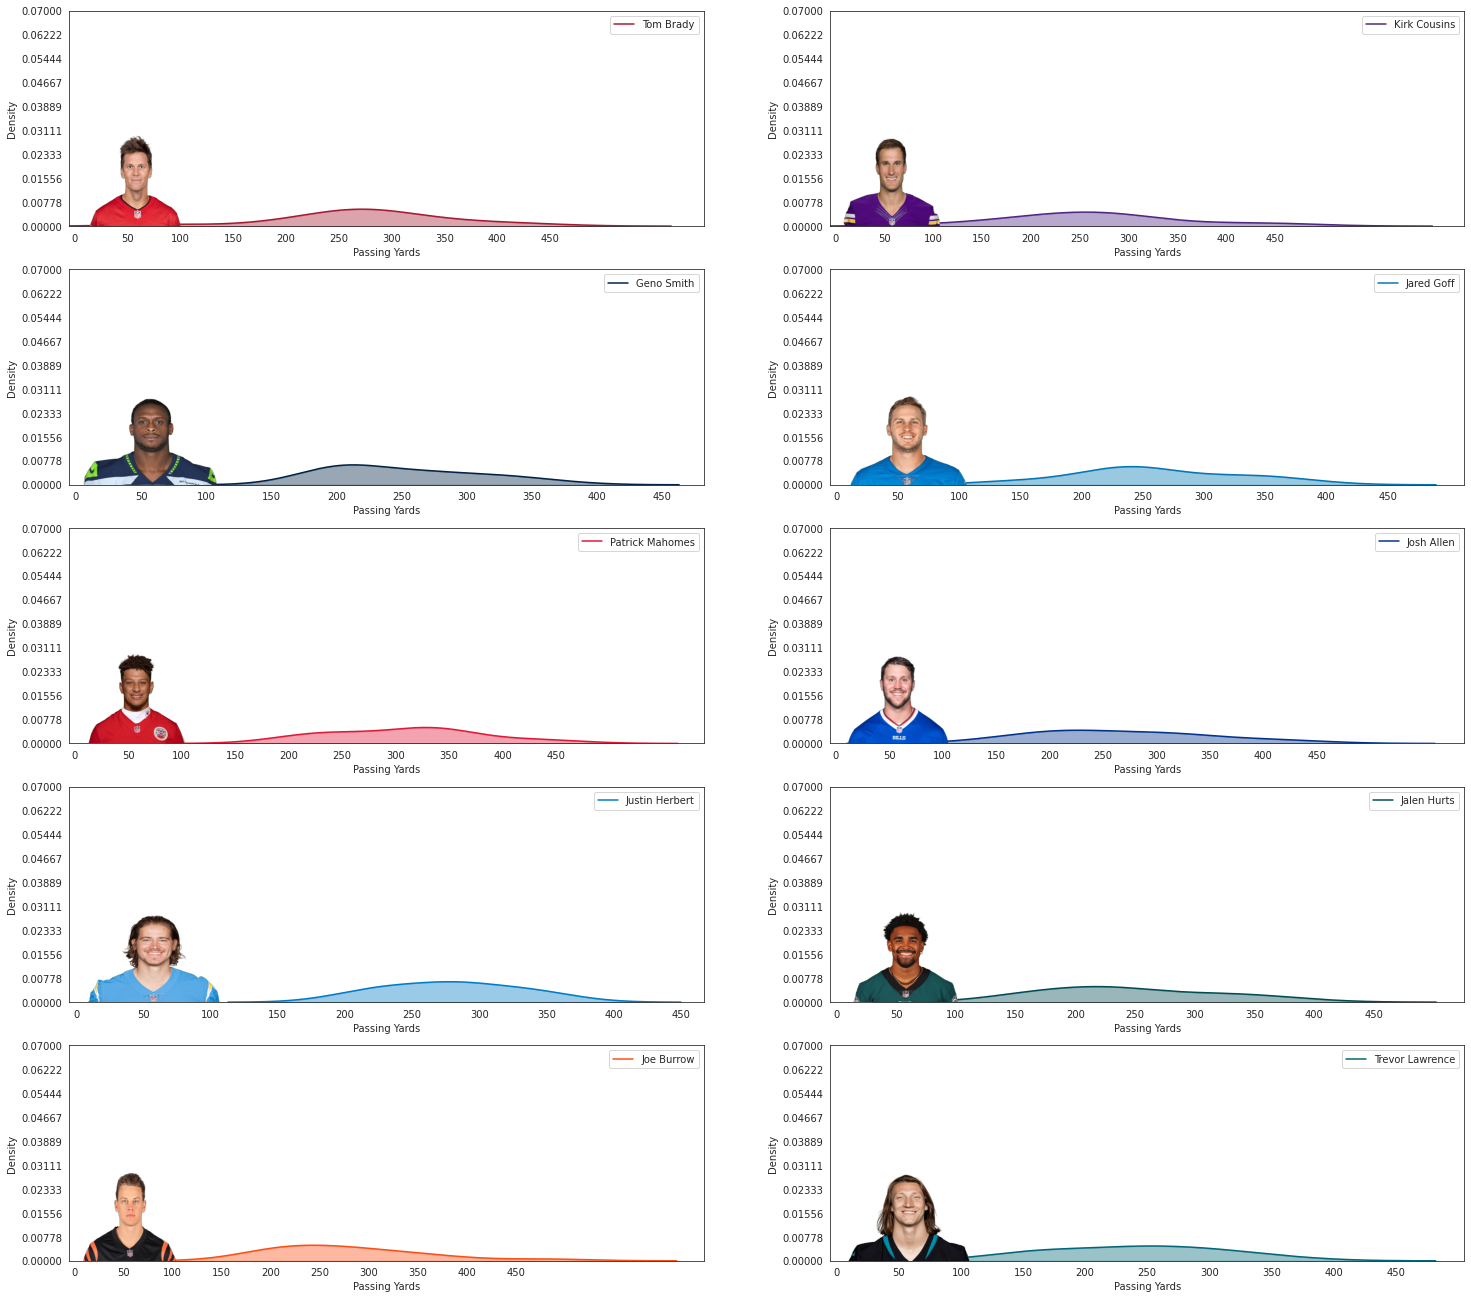

In [0]:
import seaborn as sns; sns.set_style('white');
from matplotlib import pyplot as plt # for making visualizations
import requests 
import numpy as np
from io import BytesIO
 
groups = [group for group in passing_df.groupby('player_id')]
fig, axes = plt.subplots(5, 2, figsize=(25, 23))
rows, columns = axes.shape[0], axes.shape[1]
i = 0
for row in range(rows):
    for col in range(columns):
        # get the df object
        player_df = groups[i][-1]
        player_name = player_df['player_display_name'].values[0]
        primary_color = player_df['team_color'].values[0]
        headshot_url = player_df['headshot_url'].values[0]
        # make a HTTP request to grab the player image
        response = requests.get(headshot_url)
        # load the image as bytecode
        img = plt.imread(BytesIO(response.content))
        # plot a KDE plot of the player's air yards on the row, col ax and color it with the player's team color
        ax = sns.kdeplot(player_df['passing_yards'], ax=axes[row, col], label=player_name, color=primary_color)
        ax.set_xlim(-5)
        lines = ax.get_lines()[0].get_xydata()
        x, y = lines[:, 0], lines[:, 1]
        #extent argument left, right, bottom, top
        ax.imshow(img, extent=[1, 115, 0, 0.03],aspect='auto', zorder=1000)
        #fill the area underneath the curve
        ax.fill_between(x, y, color=primary_color, alpha=0.4)
        ax.set_xticks(range(0, 500, 50))
        ax.set_yticks(np.linspace(0, 0.07, 10))
        ax.set_xlabel('Passing Yards')
        ax.set_ylabel('Density')
        #show us the legend
        ax.legend()
        i += 1
plt.show()

In [0]:
%sql
----Uncomment the line below to remove the data from your Lakehouse
--DROP CATALOG marketplace_data_example CASCADE;
